# 第五周课程内容：基于python的经典量化策略

## 简介
终于到了我们特训营的第五周学习。经过前面量化策略的学习和python的学习，相信大家一定跃跃欲试了吧~

本周让我们来实际应用一下所学到的知识和方法，进一步的研究和探讨量化策略。

一般我们可能会从论文、博客了解到某个策略，会让我们好奇这个策略究竟有没有用，表现会如何。

为了研究这个策略，我们一般需要经过以下这些步骤。在本周的作业中，让我们就跟着以下这些步骤进行实践练习

    理论学习 -> 数据收集 -> 数据分析与转换 -> 研究交易信号 -> 策略代码化 -> 策略表现回测 -> 策略优化

## 扩展阅读：

统计套利之配对交易是一种基于数学分析交易策略，其盈利模式是通过两只证券的差价（spread）来获取,两者的股价走势虽然在中途会有所偏离，但是最终都会趋于一致。配对交易就是利用这种价格偏离获取收益。具有这种关系的两个股票，在统计上称作协整性（cointegration），即它们之间的差价会围绕某一个均值来回摆动，这是配对交易策略可以盈利的基础。通俗点来讲，如果两个股票或者变量之间具有强协整性，那么不论它们中途怎么走的，它们的目的地总是一样的。

经典回归模型是建立在平稳数据变量的基础之上的，对于非平稳变量，不能使用经典回归模型，否则会出现虚假回归等诸多问题，但是实际应用中大多数时间序列是非平稳的，1987年Engle和Granger提出的协整理论及其方法，为非平稳序列的建模提供了另一种途径。虽然一些经济变量的本身是非平稳序列，但是，它们的线性组合却有可能是平稳序列。这种平稳的线性组合被称为协整方程，且可解释为变量之间的长期稳定的均衡关系。

需要特别注意的是协整性和相关性虽然比较像，但实际是不同的两个东西，两个变量之间可以相关性强，协整性却可以很弱。关于这点感兴趣的同学可以查阅相关资料进行进一步的了解，以下是一些我们推荐的网址，可以作为课后的补充学习与研究：

**协整模型的配对交易策略优化**

https://wenku.baidu.com/view/1af3df0542323968011ca300a6c30c225901f068.html

- 对协整性检验的表述非常清楚，且包含了基本的模型构建步骤

**Introduction to Pair Trading -Based on cointegration- **

https://r-forge.r-project.org/scm/viewvc.php/*checkout*/pkg/inst/doc/IntroductionToPairTrading.pdf?revision=6&root=pairtrading&pathrev=6

- 可以阅读第 1 至 26 页，能帮助理解协整性和相关系数的区别。（此链接可能需要翻墙）


**Efficient Pair Selection for Pair-Trading Strategy**
https://www.maths.ox.ac.uk/system/files/attachments/593233.pdf

- 此文研究了如何提高选择配对股票的效率

**Optimal pairs trading strategies in a cointegration framwork**

https://halshs.archives-ouvertes.fr/halshs-01566803/document

- 此文中后段，对于产生交易信号有很多的展示和讨论，能有一定的启发

## 基于协整性的配对交易 - 基本步骤

#### 第一步： 选择检验时间段的数据，进行协整关系检验
    检验资产之间的协整关系主要采用 Engle-Granger 的两步法。具体步骤是：
    
    假设有 {X} 和 {Y} 分别代表资产 X 和资产 Y 的价格序列
    对时间序列 {X} 和 {Y} 进行ADF检验，确定其均为非平稳序列并且是一阶单数
    
    接着构造并用最小二乘法（OLS）得到回归模型：
        Y = alpha + beta * X + epsilon
    
    最后对残差序列 epsilon 进行单位根检验。如果检验结果证明 epsilon 不存在单位根，
    那么 epsilon 就是平稳的，那么{Y} 和 {X} 之间存在协整关系，存在长期均衡关系
    
#### 第二步： 确定交易信号
    我们用 spread 来表示资产 X 和资产 Y 之间的价差序列
        spread = Y - beta * X
    
    对spread 计算可以得到 平均值mean_spread 和 标准差std_spread
    
    当spread 大于 mean_spread时，说明资产 Y 被高估了；当高到一定程度以后，可以产生一个
    开仓信号，卖出资产 Y 同时买入资产 X 。当spread回归到平均水平 mean_spread时平仓
    
    在这次的任务中，我们选择 mean_spread ± std_spread 作为开仓信号，
    当 spread 收敛于一个较小区间内时（mean_spread ± 0.05*std_spread）时作为平仓信号
    
#### 第三步： 编写具体策略代码
    此步骤请在优矿平台上完成
    
#### 第四步： 用新的数据进行回测，查看配对交易的表现
    此步骤请在优矿平台上完成
    
#### 第五步： 对模型和策略的进一步思考
    此步骤请在本页面完成

## 任务背景

在课程中我们尝试了手工选取两只股票进行检验，判断是否适合做配对交易，然后通过优矿平台进行了回测。

在实际操作中，我们不太会手工去挑选潜在的、适合做配对交易的股票，我们希望能有更加高效的方法去帮助筛选。

因此，我们可以事先设定一个股票池 stock_pool，从中检验协整性，并挑选适合做配对交易的两只股票的组合。

#### 在本次的任务中，我们设定了一个拥有10只股票的 stock_pool

[ "600000.XSHG", "600015.XSHG", "600016.XSHG", "600036.XSHG", "601009.XSHG","601166.XSHG", "601169.XSHG", "601328.XSHG", "601398.XSHG", "601988.XSHG"]

## 写在任务开始之前

### 注意事项：
   #### 在Stock_Datas文件夹下，已经为大家下载了以上10个股票的closing price，分别以各自股票代码命名，例如: 600000.xlsx
   #### 学员可以使用下载到本地的数据来完成以下任务，也可以直接在优矿平台上通过数据API获得数据，来完成任务

## 开始
和之前的任务一样，在开始分析前，我们首先导入要用到的模块，并且看一下数据长成什么样子


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

d = pd.read_excel("Stock_Datas/600000.xlsx")
d.head()

,tradeDate,closePrice
0,2014-01-02,9.33
1,2014-01-03,9.14
2,2014-01-06,9.19
3,2014-01-07,9.14
4,2014-01-08,9.20


#### 我们可以看到数据只有两列：
- tradeDate:    交易日期
- closePrice:   收盘价格

### 问题1（2分）：
我们需要创建一个Dataframe，名字叫做stock_data

##### 要求：
用循环的方法，依次读取stock_pool中的所有excel文件，以tradeDate为索引Index，进行数据的拼接

最后输出的列名是stock_pool的每一只股票代码。用`head()`显示stock_data的前几行

#### 输出如图显示

>**提示：** 
    - df.set_index() 设置新的索引
    - pd.concat() 按索引号拼接数据
    
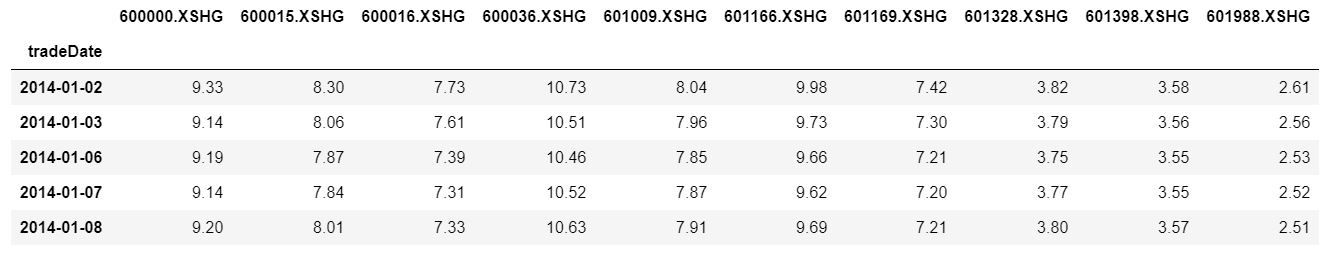

In [11]:
# 将''替换为你的代码
# define stock_pool
stock_pool = ["600000.XSHG", "600015.XSHG", "600016.XSHG", "600036.XSHG", "601009.XSHG",
              "601166.XSHG", "601169.XSHG", "601328.XSHG", "601398.XSHG", "601988.XSHG"]

'''
你的代码可能需要经历这些步骤：
1、从excel读取不同股票的数据
2、把tradeDate设为索引
3、将股票数据拼接为一张DataFrame表
4、修改列名
'''
# define stock_data, with blank value
stock_data = pd.DataFrame()

# 循环，遍历stock_pool中每一个元素
for i in stock_pool:
    file_path = "Stock_Datas/" + i[:6] + ".xlsx"
    # TO DO: 从excel读取股票数据，存为stock_i
    # '''请思考如果在优矿平台上，如何用数据API获得该股票的'''
    stock_i = pd.read_excel(file_path)
    
    # TO DO: 把tradeDate设为stock_i的索引，并且存为新的stock_i
    stock_i=stock_i.set_index('tradeDate')
    # TO DO: 把stock_data 和 stock_i 按照索引进行拼接
    stock_data = pd.concat([stock_data,stock_i],axis=1,join_axes=[stock_i.index])
    

# TO DO: 更改stock_data的列名为每个股票的代码
stock_data.columns=[stock_pool]

# 显示stock_data的前几行
stock_data.head()

,600000.XSHG,600015.XSHG,600016.XSHG,600036.XSHG,601009.XSHG,601166.XSHG,601169.XSHG,601328.XSHG,601398.XSHG,601988.XSHG
tradeDate,,,,,,,,,,
2014-01-02,9.33,8.30,7.73,10.73,8.04,9.98,7.42,3.82,3.58,2.61
2014-01-03,9.14,8.06,7.61,10.51,7.96,9.73,7.30,3.79,3.56,2.56
2014-01-06,9.19,7.87,7.39,10.46,7.85,9.66,7.21,3.75,3.55,2.53
2014-01-07,9.14,7.84,7.31,10.52,7.87,9.62,7.20,3.77,3.55,2.52
2014-01-08,9.20,8.01,7.33,10.63,7.91,9.69,7.21,3.80,3.57,2.51


### 问题2（2+1+1=4分）：
接下来我们采用 Engle-Granger 的两步法，来验证 stock_data 中任意两只股票之间的协整性

**提示：** 
python有很多第三方模块可以导入，帮助我们完成任务。对于 Engle-Granger的协整性检验方法，我们可以直接导入第三方模块 statsmodels 来计算。

请看下面的**例子**：

In [21]:
# 导入第三方模块
import statsmodels.api as sm
from IPython.display import display 

# 提取列的名称
keys=stock_data.keys()

# 以 600000.XSHG 和 600015.XSHG 为例
p1 = stock_data[keys[0]]
p2 = stock_data[keys[1]]

# 用coint函数，返回检验统计量
result = sm.tsa.stattools.coint(p1, p2)
#display(result)

result = {'t-value of unit-root test': result[0],
         'p-value': result[1],
         'Critical value for 1%': result[2][0],
         'Critical value for 5%': result[2][1],
         'Critical value for 10%': result[2][2]}

display(keys[0], keys[1], result)

'600000.XSHG'

'600015.XSHG'

{'Critical value for 1%': -3.9418879743348563,
 'Critical value for 10%': -3.0618776538564902,
 'Critical value for 5%': -3.3612859963719428,
 'p-value': 0.47699998671461874,
 't-value of unit-root test': -2.0987894567180052}

`coint()`函数可以返回检验的统计量，该函数的原假设为“不存在协整性”。如果p-value很小，则拒绝原假设，说明序列数据是具有协整性的。

我们可以看到，在这个例子中 p-value 是 **0.0106** 左右。

如果我们选择的是 **1%** 的阀值，则无法拒绝原假设，即认为不存在协整性，这两只股票**不适合做配对交易**

如果我们选择的是 **5%** 的阀值，则可以拒绝原假设，即认为存在协整性，这两只股票**可以做配对交易**

### 请参考上面的这个例子，完成以下代码。


### 要求：
- 求股票池内两两股票的协整性，输出一个协整性DataFrame，保存在 `pvalue_df` 变量中，输出 pvalue_df 如图显示：

!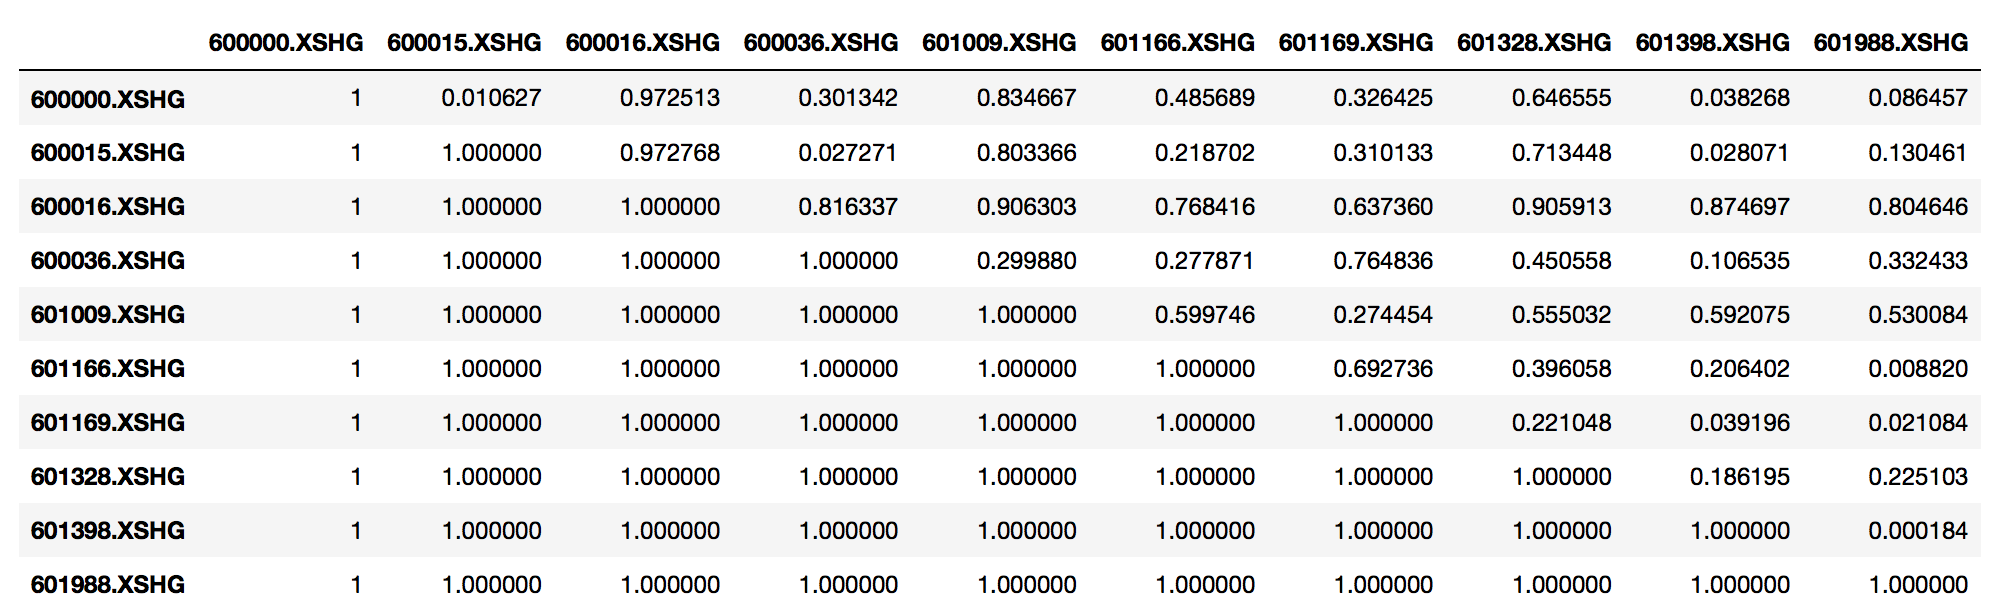

- 利用seaborn模块画出该pvalue_df的热点图【`sns.heatmap(1 - pvalue_df,cmap='RdYlGn_r', mask=(pvalue_df == 1))`】，
输出 heat map 如图显示：
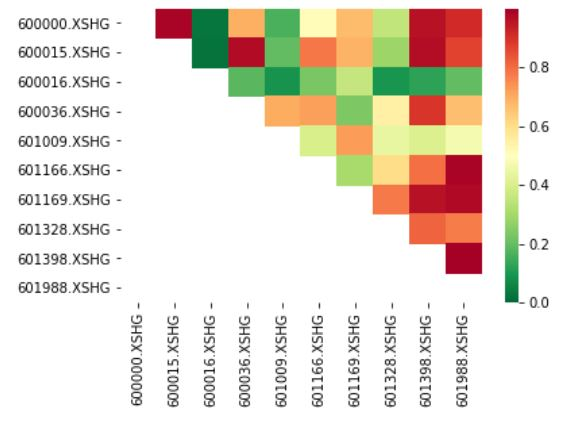

- 筛选出p-value小于阈值的股票，判断是否有存在符合条件的股票，若存在，则返回p-values值最小的一对股票名称

>**提示：**
- 利用itertools模块，可以直接进行股票的两两筛选，避免双层for循环。
- 示例如下：

In [17]:
import itertools

for i in itertools.combinations(stock_data.columns,2):
    print(i)

('600000.XSHG', '600015.XSHG')
('600000.XSHG', '600016.XSHG')
('600000.XSHG', '600036.XSHG')
('600000.XSHG', '601009.XSHG')
('600000.XSHG', '601166.XSHG')
('600000.XSHG', '601169.XSHG')
('600000.XSHG', '601328.XSHG')
('600000.XSHG', '601398.XSHG')
('600000.XSHG', '601988.XSHG')
('600015.XSHG', '600016.XSHG')
('600015.XSHG', '600036.XSHG')
('600015.XSHG', '601009.XSHG')
('600015.XSHG', '601166.XSHG')
('600015.XSHG', '601169.XSHG')
('600015.XSHG', '601328.XSHG')
('600015.XSHG', '601398.XSHG')
('600015.XSHG', '601988.XSHG')
('600016.XSHG', '600036.XSHG')
('600016.XSHG', '601009.XSHG')
('600016.XSHG', '601166.XSHG')
('600016.XSHG', '601169.XSHG')
('600016.XSHG', '601328.XSHG')
('600016.XSHG', '601398.XSHG')
('600016.XSHG', '601988.XSHG')
('600036.XSHG', '601009.XSHG')
('600036.XSHG', '601166.XSHG')
('600036.XSHG', '601169.XSHG')
('600036.XSHG', '601328.XSHG')
('600036.XSHG', '601398.XSHG')
('600036.XSHG', '601988.XSHG')
('601009.XSHG', '601166.XSHG')
('601009.XSHG', '601169.XSHG')
('601009

In [22]:
import statsmodels.api as sm
import itertools

# 创建空数据框，columns和index均为股票池内股票名称
pvalue_df = pd.DataFrame(columns=stock_data.columns,index=stock_data.columns)

for i in itertools.combinations(stock_data.columns,2):
    #TO DO: 从stock_data 获取两只股票的价格
    p1 = stock_data[i[0]]
    p2 = stock_data[i[1]]
    #TO DO: 用coint 分析他们的协整性
    result = sm.tsa.stattools.coint(p1, p2)
    #TO DO: 在pvalue_df 相应的位置填写 pvalue（可用loc函数）
    pvalue_df.ix[i[0],[i[1]]]=result[1]
    
# 将na值替换为1
pvalue_df.replace(np.nan,1,inplace=True)  # 将''替换为你的代码
# 查看pvalue_df
display(pvalue_df)

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


,600000.XSHG,600015.XSHG,600016.XSHG,600036.XSHG,601009.XSHG,601166.XSHG,601169.XSHG,601328.XSHG,601398.XSHG,601988.XSHG
600000.XSHG,1,0.477,0.982623,0.488896,0.599534,0.623101,0.148524,0.779279,0.395331,0.121448
600015.XSHG,1,1.000,0.992803,0.385120,0.714357,0.720486,0.314165,0.913359,0.518894,0.199370
600016.XSHG,1,1.000,1.000000,0.816337,0.771036,0.799411,0.813969,0.826959,0.802560,0.720103
600036.XSHG,1,1.000,1.000000,1.000000,0.373317,0.086793,0.300467,0.436297,0.298046,0.092351
601009.XSHG,1,1.000,1.000000,1.000000,1.000000,0.358038,0.354433,0.379616,0.564381,0.544484
601166.XSHG,1,1.000,1.000000,1.000000,1.000000,1.000000,0.359759,0.142193,0.139908,0.060748
601169.XSHG,1,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,0.280534,0.036153,0.092908
601328.XSHG,1,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.533954,0.622700
601398.XSHG,1,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.008837
601988.XSHG,1,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


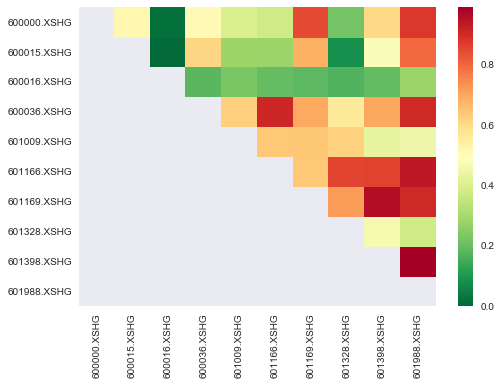

In [46]:
# 把 pvalue_df 画成热点图，看的更加直观一些。
# 红色越深，说明 pvalue 就越小，存在协整性的可能性就更大
'''掐指一算，可能需要三行哦~'''

import seaborn as sns

#TO DO: 用前面提到的 sns.heatmap()方法，画出热点图
sns.heatmap(1-pvalue_df,cmap='RdYlGn_r', mask=(pvalue_df == 1))

plt.show()

### 现有函数如下，请回答：
```
# 定义函数get_parity，判断是否存在符合条件的股票对
# 若存在，则筛选pvalue最小的股票对
# 若不存在，则返回None
def get_parity(pvalue_df, threshold=0.05):
    if pvalue_df.min().min() < 0.05:
        return (pvalue_df.min(0).idxmin(), pvalue_df.min(1).idxmin())
    else:
        print('\033[34;1mOops, 木有能配对的！QAQ\033[0m')
        return None
```
根据 pvalue_df和以上函数，判断是否存在符合配对条件（阈值小于0.05）的股票

若存在，哪两只股票的组合 p-value是最小的？

In [27]:
'''试着用给出的函数运行一下结果，写出你的结论哦~'''
def get_parity(pvalue_df, threshold=0.05):
    if pvalue_df.min().min() < 0.05:
        return (pvalue_df.min(0).idxmin(), pvalue_df.min(1).idxmin())
    else:
        print('\033[34;1mOops, 木有能配对的！QAQ\033[0m')
        return None
parity = get_parity(pvalue_df,threshold=0.05)
display(parity)

('601988.XSHG', '601398.XSHG')

**答案：** 

### （若存在合适的股票对，则完成问题3-5）
### 问题3（2分）：
我们挑选出了适合做配对交易的两只股票，接下来我们要来构建交易信号了。

首先，我需要获得两只股票的价格序列，然后进行线性回归，获得alpha和beta

##### 要求：
对最合适（p-value最小）的股票对进行如下操作：

  - 1. 从 stock_data 获得两只股票的价格序列，分别存入 x, y（**注：**parity[1]：x；parity[0]：y）
  - 2. 使用`statsmodels.api.add_constant()`，为自变量增加常数项，存入 X 中
  - 3. 使用`statsmodels.api.OLS().fit()`，对 y, X 线性回归
  - 4. 提取线性回归得到的 beta


In [49]:
# 将''替换为你的代码
# TO DO: 从stock_data获得两只股票的价格序列
import statsmodels.api as sm
y = stock_data['601988.XSHG']
x = stock_data['601398.XSHG']

# TO DO: 使用add_constant(x)，为 x 增加常数项
x = sm.add_constant(x)

# TO DO: 使用 sm.OLS().fit() 进行线性回归
OLS_result =sm.OLS(y,x).fit()

# 如果需要，可以把下方这行语句的#号去掉，显示回归的详细结果
#display(OLS_result.summary())

# TO DO: 从OLS_result.params中，提取 beta
beta =OLS_result.params[1]

# 显示beta
print('beta值为：%f' % beta)

beta值为：1.028225


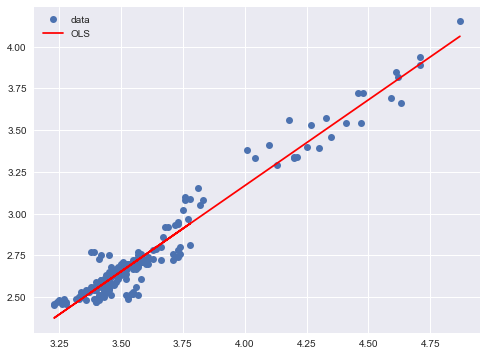

In [56]:
# 本段代码画出回归的图像，给大家一个更直观的理解
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x['601398.XSHG'], y, 'o', label="data")
ax.plot(x['601398.XSHG'], OLS_result.fittedvalues, 'r', label="OLS")
ax.legend(loc='best')
plt.show()

### 问题4（1分）：
我们用 spread 来表示资产X 和资产Y 之间的价差序列。有了 beta，我们就可以用以下公式计算 spread

    spread = Y - beta * X

对spread 计算可以得到 平均值mean_spread 和 标准差std_spread。

本次任务中，我们认为偏离一个标准差时(即 |zscore| >1 )，即可认为是开仓点。

##### 要求：
  - 设计一个自定义函数，输入的参数为 x, y, beta，输出的结果为时间序列偏离均值多少个标准差

In [1]:
# 将''替换为你的代码
import numpy as np
def zscore(x, y, beta):
    #TO DO: 计算 spread 价差序列
    sr = y-beta*x
    #TO DO: 返回偏离均值多少个标准差  (sr - mean of sr) / (std of sr)
    return (sr-np.mean(sr))/np.std(sr)

zscore(x, y, beta).head()

NameError: name 'x' is not defined

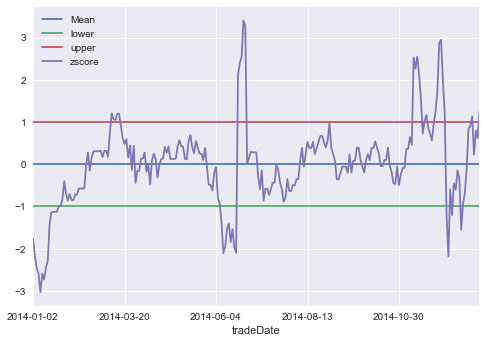

In [55]:
# 本段代码可以画出图像，方便理解
z_score = zscore(x['601398.XSHG'], y, beta)

all_stat = pd.DataFrame({'zscore': z_score, 
                         'Mean': np.mean(z_score),
                         'upper':1,
                         'lower': -1})
all_stat.plot()
plt.legend(all_stat.columns)
plt.show()

### 问题5（1分）：
请依据以上的研究结果，在优矿平台上对你的策略进行回测。

请将作业附件中的 **第五周任务.nb** 上传到优矿平台，并在平台上按要求完成任务。

最后把回测的结果截图，插入到下方。（插入方法：双击下面的框，Edit -> Insert Image）

##### 截图样例如下：
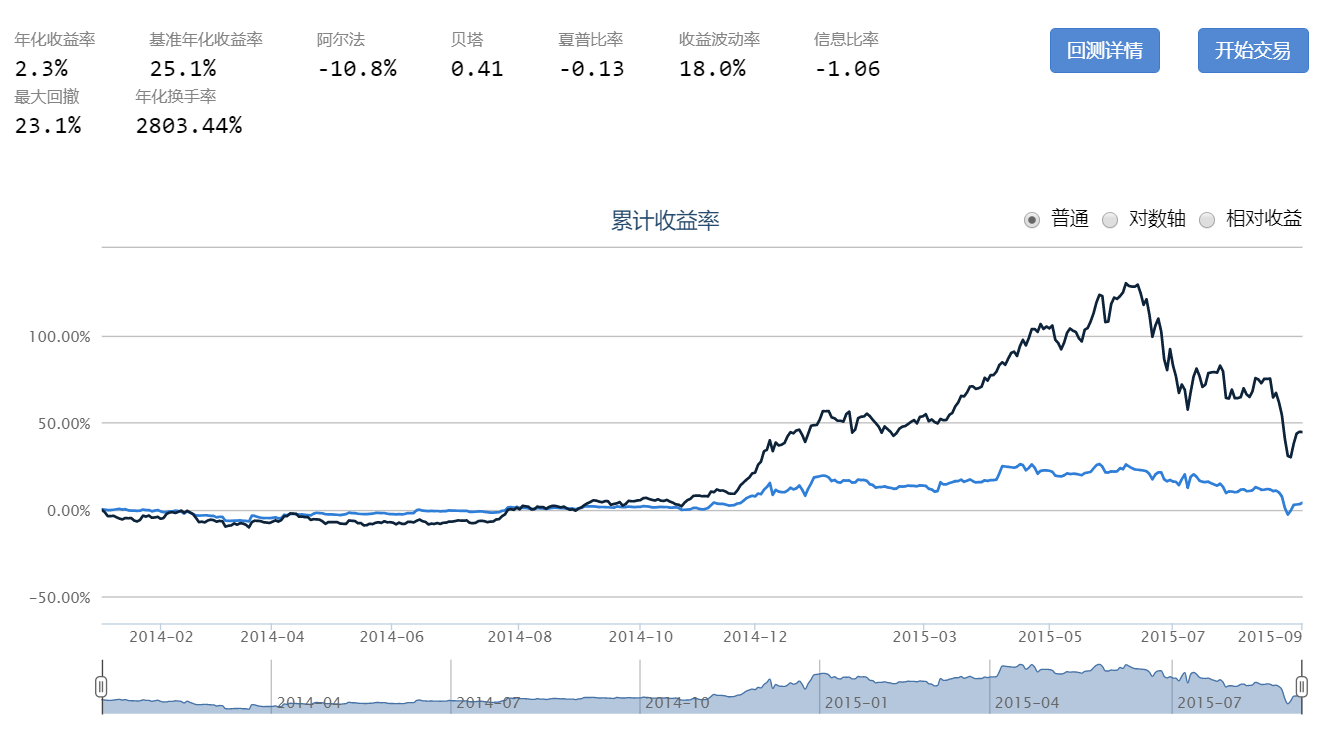

### 回答：
#### 请双击此处，并插入回测结果截图
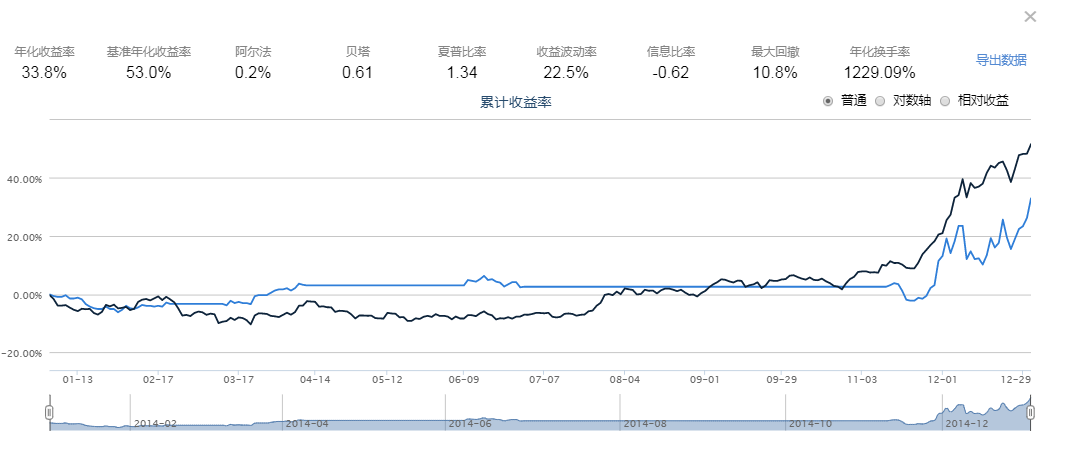



### 进一步的思考：
到此为止，我们通过2014年的数据，检验并挑选出了最适合做配对交易的两只股票，并且使用2014年的数据，进行了策略的回测。

接下来，我们来对模型和策略做进一步的思考：

### 问题6（5分）： 
使用我们在问题5中的模型（即保持使用2014年数据计算得到的 mean_spread 和 std_spread），对2015年，2016年，2017年分别进行回测。

请简单描述一下你的回测结果，并猜测为什么会出现这样的回测结果？

### 答：2015年收益率为-8.1%，基准收益率为5.7%最大撤回为37.7%，2016年收益率为-14.4%，最大撤回22.8%，而基准收益率为-11.5%、2017年收益率为48.8%超过基准22.4%，且最大撤回为8.2%这三年最小。因为在这个程序默认是用2014年差值的平均数和标准差，而2015年，2016年，2017年市场均有巨大的变化，标准差和均值都不是2014的数值，所以造成zscore不准，不再反应真实的价格对均值的距离。



### 问题7（5分）： 
如果仔细审查问题5中的模型与策略，你会发现我们的模型并没有设计任何止损的条件和情况。我们知道，现实中两只股票的价差可能最终不会收敛，甚至可能会越来越大，如果缺少止损设计的话，我们的头寸将面临非常大的亏损风险。

请思考并简单描述一下，你会如何设计止损的规则？

### 答：可以设定一个阈值，比如初始本金损失到80%，且是由于自己买进卖出配对交易的两只股票造成的，而非大盘剧烈波动造成的损失，这个时候停止所有买进活动，如果一直卖出的那只股票卖出价高于成本价，则可以成交，否则也停止卖出。如果连续30天两只股票股价之差仍在区间外，且现有规则下无法买进，则弹出提示，股票可能不再适合该策略。



### 问题8（5分）： 
除了风险管理、止损设计之外，我们发现问题5中的策略对待仓位也是简单粗暴的。开仓和平仓都是一次性动用了全部的资金。这显然不是一个科学的管理仓位方法。 

请思考并简单描述一下，你会如何设计改善仓位管理？

### 答：当买入股票的时候，并不直接买足100%而是50%，如果第二天仍然存在机会，则继续买入10%，最高买入到总量的80%。卖出同理，一次性卖出头寸中的50%，如果第二天仍然存在机会，继续卖出10%，直至卖出所有头寸的80%。



# 总结
坚持到这里的你已经非常了不起了！为自己鼓掌！

这次的任务我们从一个策略出发，收集数据，分析数据，构建自己的策略，并且对该策略的问题有了进一步的思考，这是一次难得的实践体验。

## 作业提交方法
> **注意：** 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**  **请把 HTML + Week5_作业_题目.ipynb + 优矿平台导出的 .nb文件打包，做为你的作业提交。

**提交方法：**
登陆语雀并注册  https://www.yuque.com/   

选择右上角 + 号，新建知识库，任意命名。然后新建文档

在文档内，类似word的操作，插入附件，选择你打包的 zip 文件。

右上角选择分享，开启分享，复制链接，把该链接在小程序里提交即可。